# **K-medoids**

K-medoids is an unsupervised clustering algorithm that groups data into K clusters by selecting actual data points, called medoids, to represent each cluster's center. Unlike K-means, which uses data points' averages (centroids), K-medoids uses a real data point that is most centrally located within the cluster, minimizing the total distance to all other points in that cluster.

This approach makes K-medoids more robust to outliers and noise than K-means.

`!pip install pyclustering`

## **Examples**

### **Example - 1**

In [22]:
from sklearn.datasets import make_blobs
from pyclustering.cluster.kmedoids import kmedoids
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    random_state=42
)

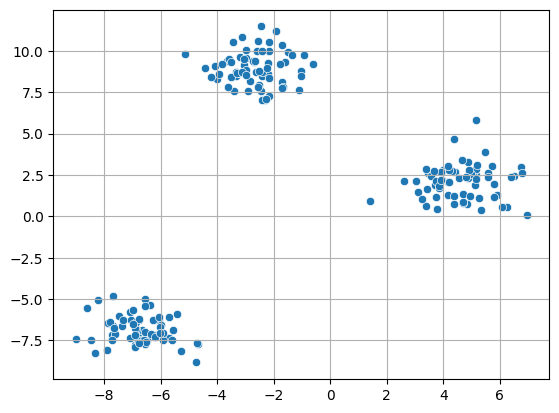

In [24]:
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.grid(True)
plt.show()

In [25]:
# selecting initial medoids positions (indexes)
initial_medoids = [0, 50, 100]

# running model
kmedoids_instance = kmedoids(
    X.tolist(),
    initial_index_medoids=initial_medoids
)
kmedoids_instance.process()

In [26]:
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

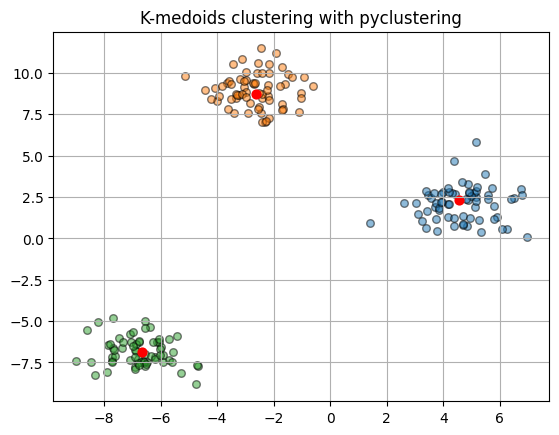

In [27]:
for cluster in clusters:
    cluster_points = np.array([X[i] for i in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 30, alpha=0.5, edgecolor = 'k')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=40)
plt.title("K-medoids clustering with pyclustering")
plt.grid(True)
plt.show()

## **Best k value selection**

### **Silhouette coefficient**

In [30]:
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# generating data

X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.5,
    random_state=42
)

[]

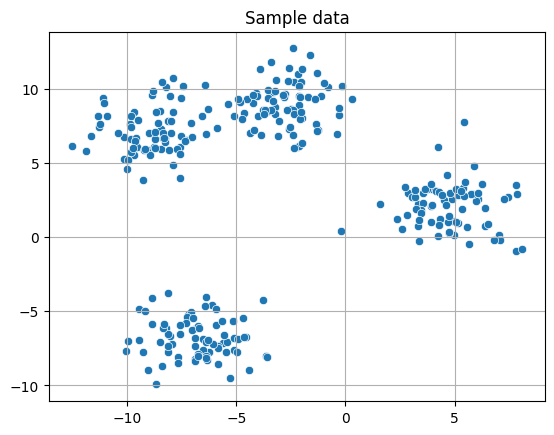

In [31]:
# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("Sample data")
plt.grid(True)
plt.plot()

In [32]:
# kmedoids function
def kmedoids_labels(X, k):
    initial_medoids = np.random.choice(len(X), k, replace=False).tolist()
    kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()

    lables = np.zeros(len(X), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for idx in cluster:
            lables[idx] = cluster_idx
    return lables

In [33]:
for k in range(2, 11):
    labels = kmedoids_labels(X, k)
    score = silhouette_score(X, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.5571
k = 3, Silhouette Score = 0.7019
k = 4, Silhouette Score = 0.6911
k = 5, Silhouette Score = 0.6048
k = 6, Silhouette Score = 0.4899
k = 7, Silhouette Score = 0.4489
k = 8, Silhouette Score = 0.3249
k = 9, Silhouette Score = 0.3483
k = 10, Silhouette Score = 0.3336


So the best values of k are 3 or 4

From data observation we can conclude that, 4 is the best value for the number of clusters

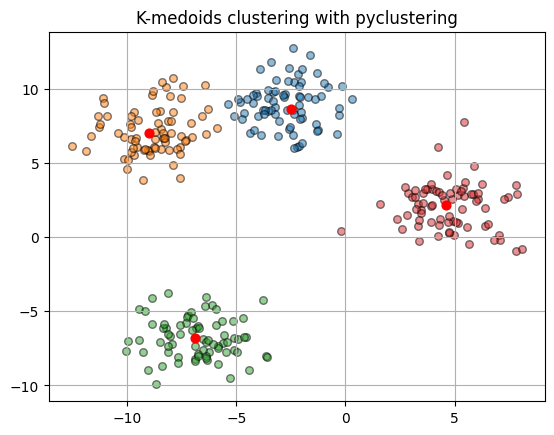

In [35]:
k = 4
initial_medoids = np.random.choice(len(X), k, replace=False).tolist()
kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()


for cluster in clusters:
    cluster_points = np.array([X[i] for i in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 30, alpha=0.5, edgecolor = 'k')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=40)
plt.title("K-medoids clustering with pyclustering")
plt.grid(True)
plt.show()

### **elbow method**

In [39]:
# using the same aboved data

def kmedoids_total_cost(X, k):
    initial_medoids = np.random.choice(len(X), k, replace=False).tolist()
    kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    total_cost = 0
    for cluster_idx, cluster in enumerate(clusters):
        medoid_point = np.array(X[medoids[cluster_idx]])
        for idx in cluster:
            total_cost += np.linalg.norm(X[idx] - medoid_point)
    return total_cost  


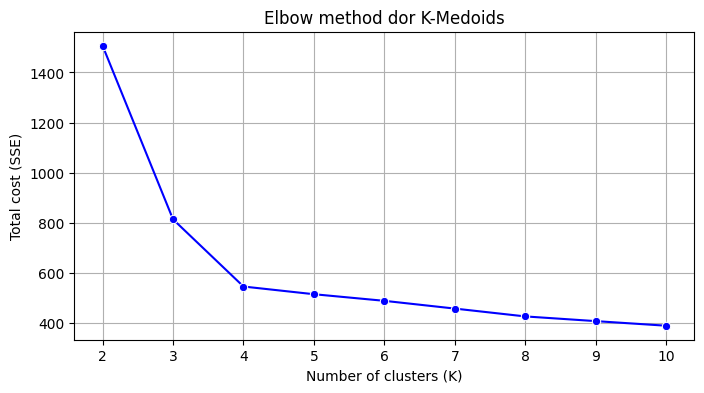

In [45]:
costs = []
ks = range(2, 11)
for k in ks:
    cost = kmedoids_total_cost(X, k)
    costs.append(cost)

# plot the elbow curve
plt.figure(figsize=(8, 4))
sns.lineplot(x = ks, y = costs, marker = 'o', color = 'blue')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Total cost (SSE)")
plt.title("Elbow method dor K-Medoids")
plt.grid(True)
plt.show()


From Elbow method, we can get that '4' is the best value for number of clusters

## **k-means problem solved by k-medoids**

k-means suffers/wrong predictions because of outliers and noise in the data

k-medoids is robust to outliers

### **K-means problem**

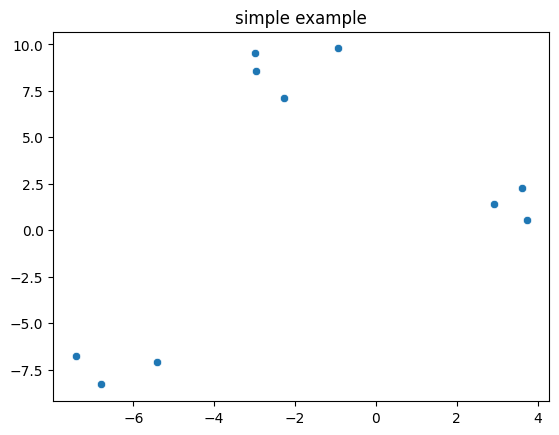

In [48]:
from sklearn.cluster import KMeans

X,y = make_blobs(
    n_samples=10,
    n_features=2,
    centers=3,
    cluster_std=1,
    shuffle=True,
    random_state=42
)
# plotting

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.show()

From observation,

we can decide that, number of clusters are 3, and the centroids are correctly settled at the center

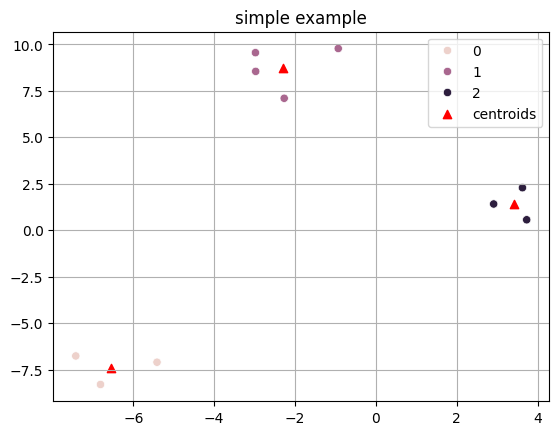

In [49]:
kmeans = KMeans(
    n_clusters =3,
    init = 'k-means++',
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

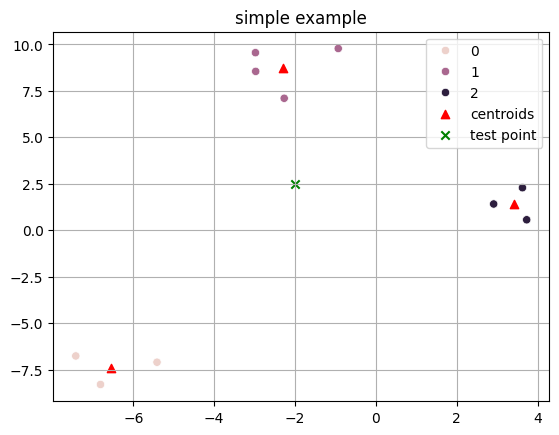

Test point: [-2, 2.5]
Predicted cluster of the test point: [2]


In [50]:
# say there is a test point [-2, 2.5]
test_point = np.array([[-2, 2.5]])


# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.scatter(test_point[:, 0], test_point[:, 1], c='green', marker='x', label='test point')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

# test point cluster prediction
print(f"Test point: {[-2, 2.5]}")
print(f"Predicted cluster of the test point: {kmeans.predict(test_point)}")

So, as predicted, the test point belonged to cluster '2'

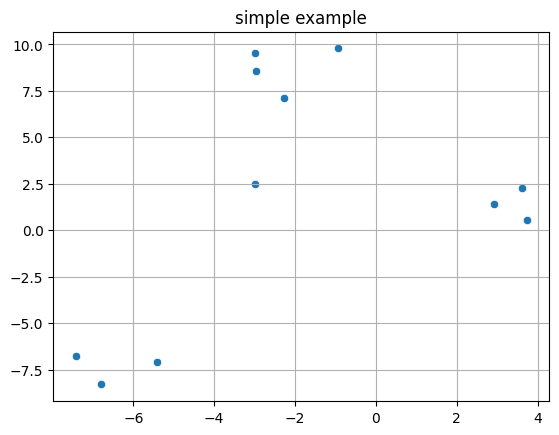

In [51]:
# say there is a outlier point at [-3, 2.5]
X = np.vstack((X, np.array([[-3, 2.5]])))

#plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("simple example")
plt.grid(True)
plt.show()

Due to the outlier, the centroid positions changes

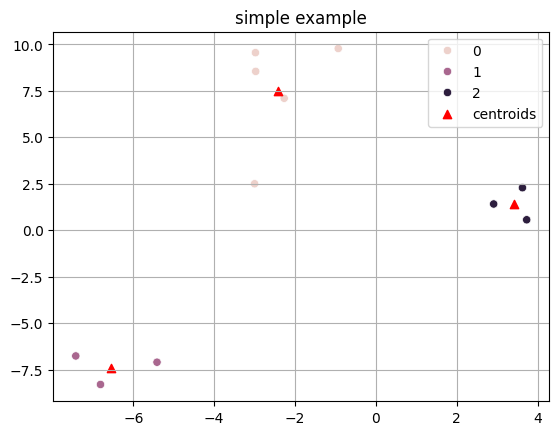

In [52]:
kmeans = KMeans(
    n_clusters =3,
    init = 'k-means++',
    random_state = 42
).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

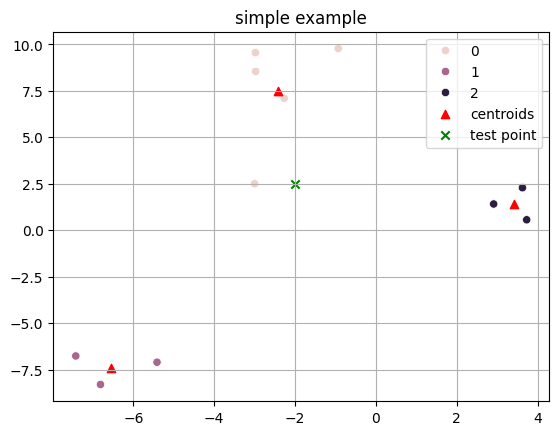

Test point: [-2, 2.5]
Predicted cluster of the test point: [0]


In [53]:
# say there is a test point [-2, 2.5]
test_point = np.array([[-2, 2.5]])


# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',marker='^', label='centroids')
plt.scatter(test_point[:, 0], test_point[:, 1], c='green', marker='x', label='test point')
plt.title("simple example")
plt.legend()
plt.grid(True)
plt.show()

# test point cluster prediction
print(f"Test point: {[-2, 2.5]}")
print(f"Predicted cluster of the test point: {kmeans.predict(test_point)}")

We can observe that, the prediction of test point changes (due to outlier)

### **with k-medoids**

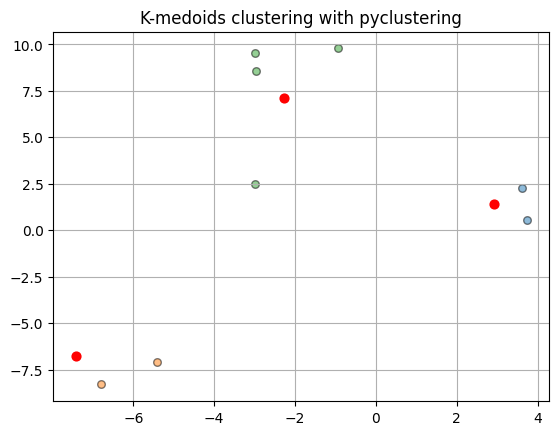

In [54]:
# using the same X data after stacking

from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = np.random.choice(len(X), 3, replace = False).tolist()
kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

for cluster in clusters:
    cluster_points = np.array([X[i] for i in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 30, alpha=0.5, edgecolor = 'k')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=40)
plt.title("K-medoids clustering with pyclustering")
plt.grid(True)
plt.show()

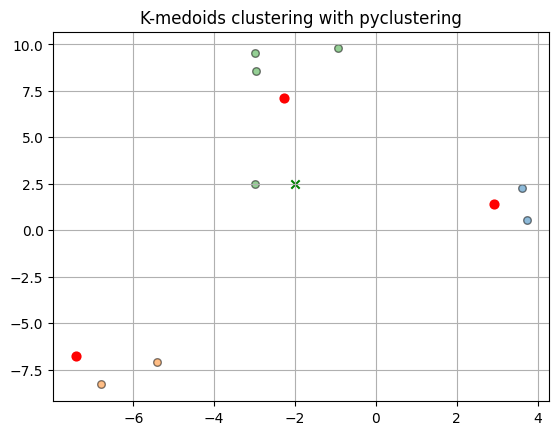

New test point [-2.   2.5] belongs to cluster: 2


In [61]:
# prediction for same test point
def predict_kmedoids(new_point, medoids):
    distances = np.linalg.norm(medoids - new_point, axis=1)
    return np.argmin(distances)

test_point = np.array([-2, 2.5])
actual_medoids = np.array([X[i] for i in medoids])

cluster_label = predict_kmedoids(test_point, actual_medoids)

for cluster in clusters:
    cluster_points = np.array([X[i] for i in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 30, alpha=0.5, edgecolor = 'k')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=40)
plt.scatter(test_point[0], test_point[1], marker='x', color = 'green')
plt.title("K-medoids clustering with pyclustering")
plt.grid(True)
plt.show()


print(f"New test point {test_point} belongs to cluster: {cluster_label}")

## **Problem with k-medoids**

### **data distribution**

In [88]:
# circles data

from sklearn.datasets import make_circles

X, y = make_circles(
    n_samples=1000,
    noise=0.05,
    factor=0.5,
    random_state=42
)

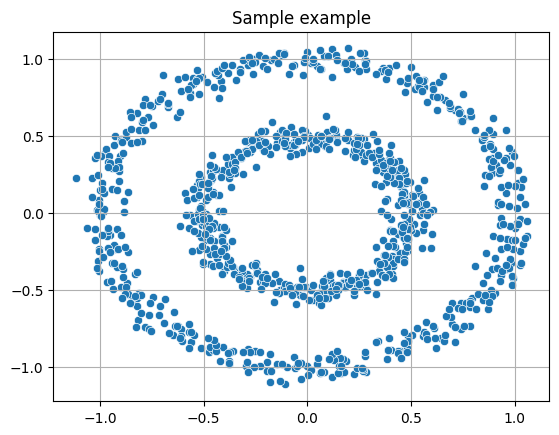

In [89]:
# plotting
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title("Sample example")
plt.grid(True)
plt.show()

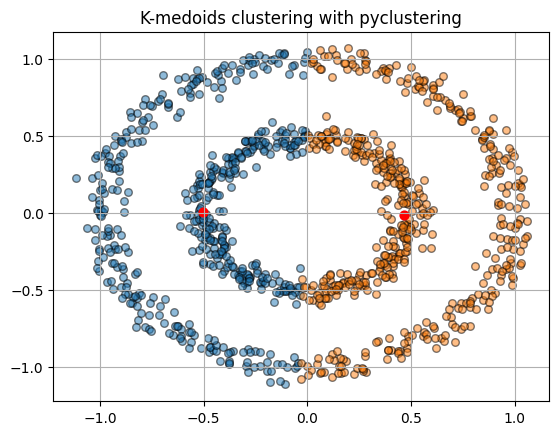

In [91]:
# using kmedoids

initial_medoids = np.random.choice(len(X), 2, replace=False).tolist()
kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# plotting
for cluster in clusters:
    cluster_points = np.array([X[i] for i in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 30, alpha=0.5, edgecolor = 'k')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=40)
plt.title("K-medoids clustering with pyclustering")
plt.grid(True)
plt.show()

Actually there are two clusters, 

One is inner circle, other is outer circle

But k-medoids also failed because of data distribution